In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import datetime
from scipy import stats
import matplotlib
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data Load**

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/TULIP00/train_V2.csv')
df_test = pd.read_csv('/content/drive/MyDrive/TULIP00/test_V2.csv')

In [ ]:
df_train

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,squad-fpp,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad-fpp,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,squad-fpp,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [ ]:
df_test

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,0,0,0,0.00,1884,squad-fpp,28,28,1500,0,0.0,0,0.000,0,0,588.00,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,0,2,1,361.90,1811,duo-fpp,48,47,1503,2,4669.0,0,0.000,0,0,2017.00,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,0,0,0,0.00,1793,squad-fpp,28,27,1565,0,0.0,0,0.000,0,0,787.80,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,0,0,0,0.00,1834,duo-fpp,45,44,1465,0,0.0,0,0.000,0,0,1812.00,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,0,3,1,60.06,1326,squad-fpp,28,27,1480,1,0.0,0,0.000,0,0,2963.00,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934169,a316c3a13887d5,80e82180c90951,f276da5fd73536,1,2,381.00,3,0,7,4,1294,4,2,69.27,1292,squad-fpp,22,20,-1,1,0.0,0,0.000,0,0,1799.00,5,1526
1934170,5312146b27d875,147264a127c56e,fb77cbfe094a6b,0,0,0.00,0,0,0,64,1449,0,0,0.00,1301,squad-fpp,27,26,-1,0,0.0,0,0.000,0,0,1195.00,3,1496
1934171,fc8818b5b32ad3,7bbb4779ebedd5,efb74d5f6e9779,0,0,91.96,0,0,3,24,0,1,1,25.38,1314,squad-fpp,29,29,1482,0,0.0,0,7.798,1,0,3327.00,3,0
1934172,a0f91e35f8458f,149a506a64c2b1,3a2cf335bc302f,1,2,138.60,0,0,12,25,0,1,1,67.89,1333,duo-fpp,49,48,1456,1,0.0,0,0.000,0,0,1893.00,4,0


In [ ]:
df_train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [ ]:
df_train=df_train.dropna(inplace=False)


In [ ]:
df_train.shape

(4446965, 29)

**Correlation**

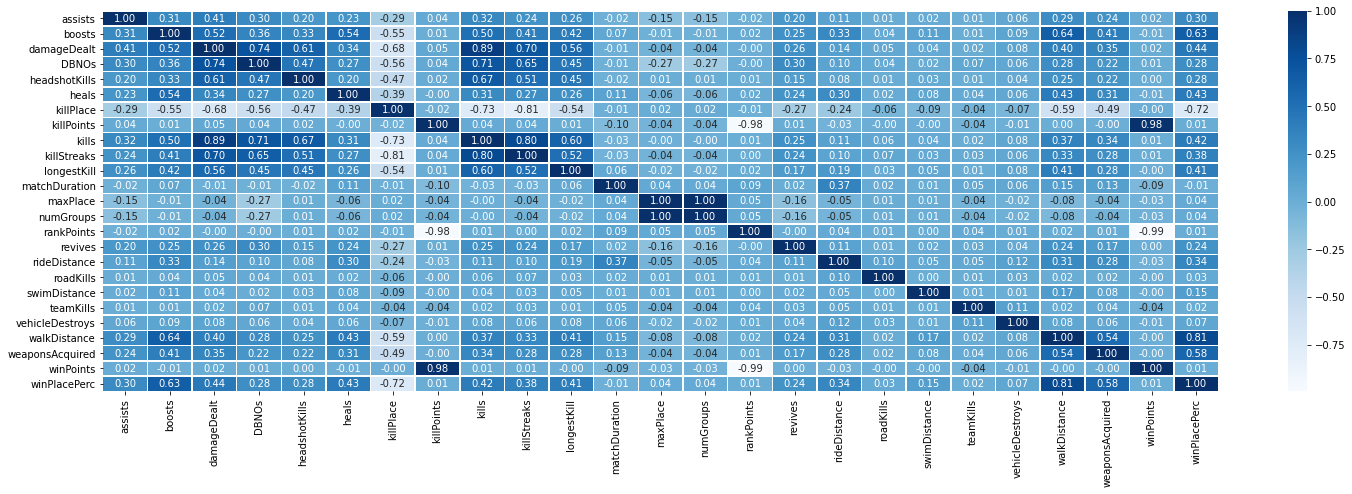

In [ ]:
import seaborn as sns

corr = df_train.corr()
high = corr[(corr["winPlacePerc"]>0.3) | (corr["winPlacePerc"]< -0.3)]
fig = plt.figure(figsize = (25, 7))
sns.heatmap(data = corr, annot = True, fmt = '.2f', linewidths = .5, cmap = 'Blues')
plt.show()

In [ ]:
fig.savefig('corr.eps',dpi=600,format='eps')


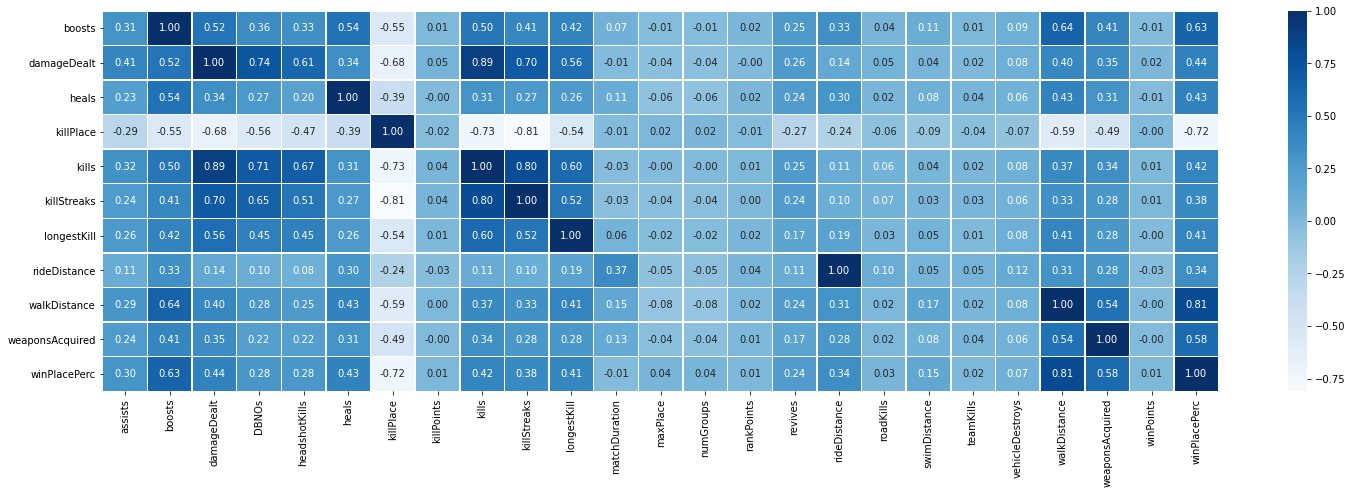

In [ ]:
fig1=plt.figure(figsize = (25, 7))
sns.heatmap(data = high, annot = True, fmt = '.2f', linewidths = .5, cmap = 'Blues')

In [ ]:
fig1.savefig('highcorr.eps',dpi=600,format='eps')


**Data Preprocess**

In [ ]:
df_train = df_train[:10000]
X = df_train.drop(["Id","groupId","matchId","matchType","winPlacePerc"], axis=1)
y = df_train["winPlacePerc"]


In [ ]:
from sklearn.preprocessing import StandardScaler
cols = X.columns
scaler = StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X,columns=cols)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Data Visualization**

The plot shows that players in different game type 

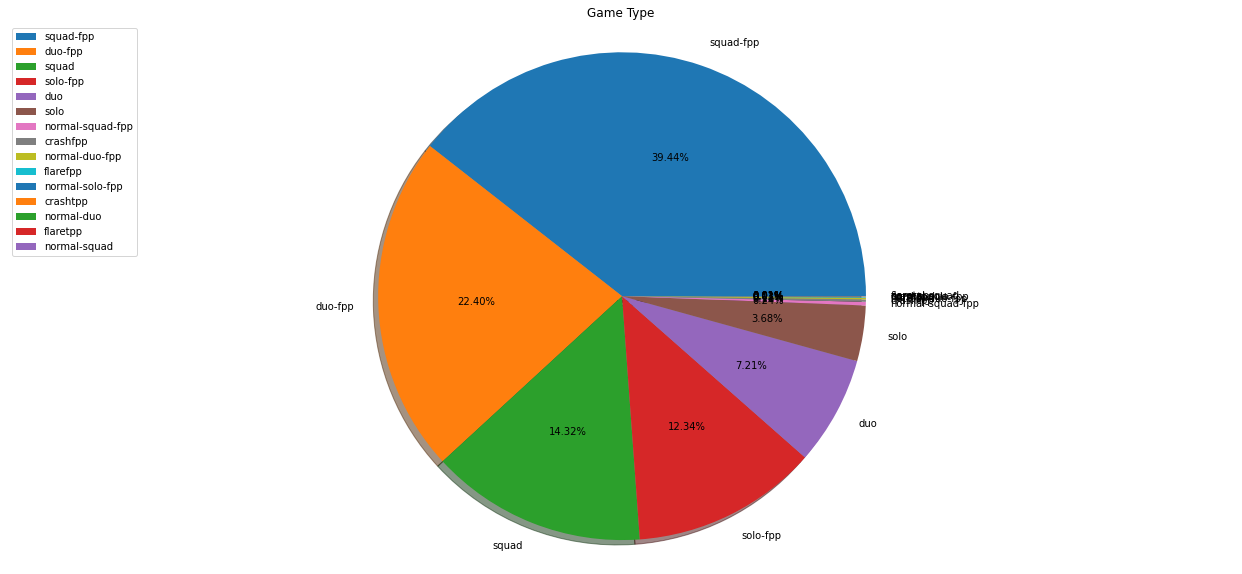

In [ ]:
fig2 = plt.figure(figsize=(22,10))
label=df_train.matchType.value_counts().index
plt.pie(df_train.matchType.value_counts(),labels=label,autopct='%.2f%%',shadow=True)
plt.axis('equal')
plt.title('Game Type')
plt.legend(loc='upper left')
plt.show()

In [ ]:
fig2.savefig('pie.eps',dpi=600,format='eps')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

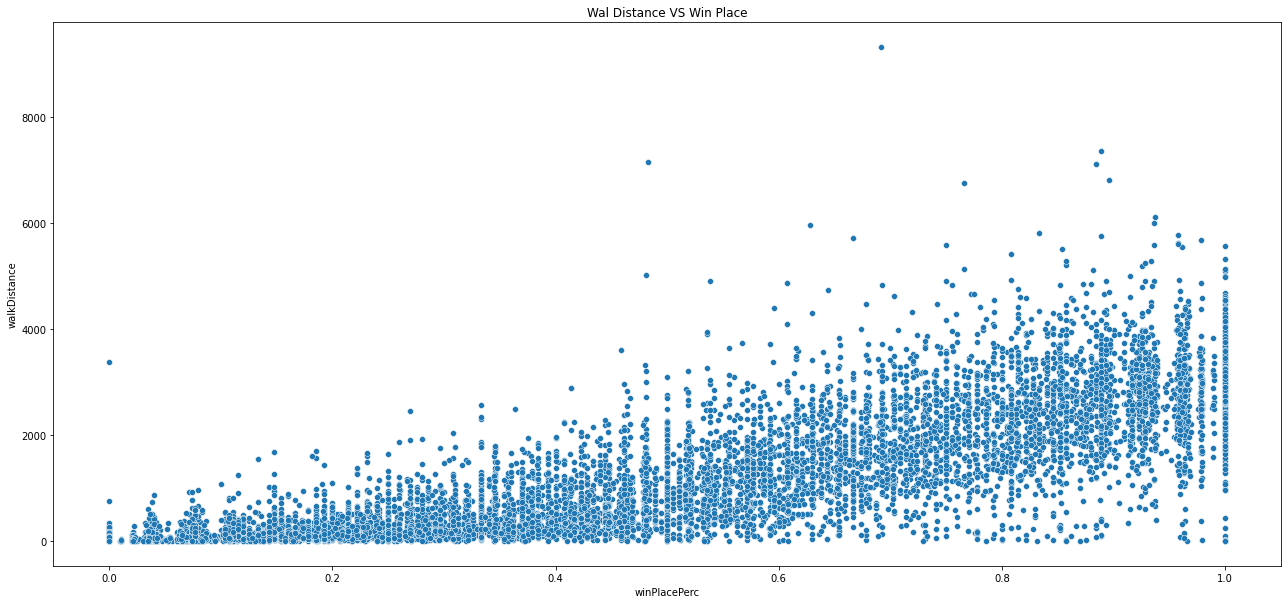

In [ ]:
import seaborn as sns

fig3=plt.figure(figsize=(22,10))
sns.scatterplot(x=df_train['winPlacePerc'],y=df_train['walkDistance'])
plt.title("Wal Distance VS Win Place")
plt.show()

In [ ]:
fig3.savefig('scatter.eps',dpi=600,format='eps')


**Model Define**

In [ ]:
l= LinearRegression()
d= DecisionTreeRegressor(s)

**Linear Regression**

In [ ]:
param_grid={'fit_intercept':[True,False],'normalize':[True,False]}
grid= GridSearchCV(l,param_grid,cv=3,scoring='neg_mean_squared_error')
lr = grid.fit(X_train,Y_train)

In [ ]:
print("Best parameters are: ",lr.best_estimator_)
print("Best MSE score: ",-lr.best_score_)

Best parameters are:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
Best MSE score:  0.01564124116618947


In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([0.76423295, 0.92286468, 0.8760955 , ..., 0.2571705 , 0.23322414,
       0.69958462])

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error
import sklearn.metrics as metrics

print('Mean Squared Error: ', metrics.mean_squared_error(Y_test,y_pred))

Mean Squared Error:  0.015303007019988265


**Decision Tree**

In [ ]:
dt_grid={'criterion' : ["mse", "friedman_mse", "mae"],'min_samples_leaf':[1,2]}
dtgrid= GridSearchCV(d,dt_grid,cv=3,scoring='neg_mean_squared_error')
dt = dtgrid.fit(X_train,Y_train)
print("Best parameters are: ",dt.best_estimator_)
print("Best MSE score: ",-dt.best_score_)

Best parameters are:  DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
Best MSE score:  0.01859312767771217


In [ ]:
dt_pred = dt.predict(X_test)
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test,y_pred))

Mean Squared Error:  0.17048691321544765
